<a href="https://colab.research.google.com/github/worldterminator/mess/blob/main/leap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rationale

For each year, I keep only the matched records from enrollment and assessment (tho score could be NA) files. Yet across different years, I keep the unmatched student IDs.
Then, each student that remains in the sample should have scores in all their enrolled years (NA included), allowing me to identify cohorts based on first year of enrollment and grade levels.

#Attempt with 16-17 data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# File path
file_path = '/content/drive/My Drive/Assessment201617.csv'

# Read the CSV file
data= pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,TermName,DistrictName,District_StateID,SchoolName,School_StateID,StudentID,Student_StateID,Subject,Course,GrowthMeasureYN,...,ProjectedProficiencyStudy6,ProjectedProficiencyLevel6,ProjectedProficiencyStudy7,ProjectedProficiencyLevel7,ProjectedProficiencyStudy8,ProjectedProficiencyLevel8,ProjectedProficiencyStudy9,ProjectedProficiencyLevel9,ProjectedProficiencyStudy10,ProjectedProficiencyLevel10
0,Spring 2016-2017,Leap Academy University Charter School,807109,STEM Lower Elementary,NaN,1002,1.591820e+09,Mathematics,Math K-12,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spring 2016-2017,Leap Academy University Charter School,807109,STEM Lower Elementary,NaN,1002,1.591820e+09,Language Arts,Reading,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Spring 2016-2017,Leap Academy University Charter School,807109,STEM Lower Elementary,NaN,1003,7.816959e+09,Mathematics,Math K-12,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Spring 2016-2017,Leap Academy University Charter School,807109,STEM Lower Elementary,NaN,1003,7.816959e+09,Language Arts,Reading,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Spring 2016-2017,Leap Academy University Charter School,807109,STEM Lower Elementary,NaN,1005,6.200882e+09,Mathematics,Math K-12,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


List of column names you want to drop
columns_to_drop = ['column_name4', 'column_name5']

Drop these columns
data.drop(columns=columns_to_drop, inplace=True)

In [4]:
# List of column names you want to keep
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']

# Create a new DataFrame with only these columns
score1617= data[columns_to_keep]

score1617.head()


,StudentID,Student_StateID,TestName,TestRITScore,LexileScore
0,1002,1.591820e+09,Growth: Math K-2 CCSS 2010 V2,213,NaN
1,1002,1.591820e+09,Growth: Reading K-2 CCSS 2010,195,511
2,1003,7.816959e+09,Growth: Math K-2 CCSS 2010 V2,196,NaN
3,1003,7.816959e+09,Growth: Reading K-2 CCSS 2010,183,295
4,1005,6.200882e+09,Growth: Math K-2 CCSS 2010 V2,191,NaN


In [5]:
# Set display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [6]:
print(score1617)

# if want to convert state ID: map1617['column_name'] = map1617['column_name'].astype(int)


       StudentID  Student_StateID                          TestName  \
0           1002   1591820143.000     Growth: Math K-2 CCSS 2010 V2   
1           1002   1591820143.000     Growth: Reading K-2 CCSS 2010   
2           1003   7816959131.000     Growth: Math K-2 CCSS 2010 V2   
3           1003   7816959131.000     Growth: Reading K-2 CCSS 2010   
4           1005   6200882279.000     Growth: Math K-2 CCSS 2010 V2   
...          ...              ...                               ...   
3066  9982194839              NaN   Growth: Reading 6+ CCSS 2010 V2   
3067  9983529412   9983529412.000     Growth: Math 2-5 CCSS 2010 V2   
3068  9983529412   9983529412.000  Growth: Reading 2-5 CCSS 2010 V2   
3069  9983668608              NaN     Growth: Math 2-5 CCSS 2010 V2   
3070  9983668608              NaN  Growth: Reading 2-5 CCSS 2010 V2   

      TestRITScore LexileScore  
0              213         NaN  
1              195         511  
2              196         NaN  
3              

Current strategy: join RIT score with enrollment for each year, and then making panels

In [7]:
# File path
file_path = '/content/drive/My Drive/Enrollment201617.csv'

# Read the CSV file
data= pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,TermName,DistrictName,District_StateID,SchoolName,School_StateID,StudentID,Student_StateID,StudentDateOfBirth,StudentEthnicGroup,NWEAStandard_EthnicGroup,StudentGender,Grade,NWEAStandard_Grade
0,Spring 2016-2017,Leap Academy University Charter School,807109,STEAM High School,NaN,1018256150,1018256150.000,7/22/2000,Hispanic,Hispanic or Latino,M,11,11
1,Spring 2016-2017,Leap Academy University Charter School,807109,STEAM High School,NaN,1084712619,NaN,12/6/1998,Hispanic,Hispanic or Latino,M,12,12
2,Spring 2016-2017,Leap Academy University Charter School,807109,STEAM High School,NaN,1163227042,NaN,10/31/2000,Hispanic,Hispanic or Latino,F,10,10
3,Spring 2016-2017,Leap Academy University Charter School,807109,STEAM High School,NaN,1183257367,NaN,3/19/1999,Black,Black or African American,M,12,12
4,Spring 2016-2017,Leap Academy University Charter School,807109,STEAM High School,NaN,12272753,6136857128.000,2/29/2000,Hispanic,Hispanic or Latino,F,11,11


In [8]:
# List of column names you want to keep
columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']

# Create a new DataFrame with only these columns
enrollment1617= data[columns_to_keep]

enrollment1617.head()

,StudentID,Student_StateID,StudentEthnicGroup,StudentGender,Grade
0,1018256150,1018256150.000,Hispanic,M,11
1,1084712619,NaN,Hispanic,M,12
2,1163227042,NaN,Hispanic,F,10
3,1183257367,NaN,Black,M,12
4,12272753,6136857128.000,Hispanic,F,11


In [9]:

# Merge on 'StudentID' with an indicator
merged_df = pd.merge(score1617, enrollment1617, on='StudentID', how='inner', indicator=True)

merged16 = merged_df[merged_df['_merge'] == 'both']

merged16.drop(columns=['_merge'], inplace=True)

tried merging on one of 'student id' and 'state id' sperately and combine the merges and hadnle teh duplicate columns, did not work out well bc multiple observations matched to the same id/combination of ids? not sure, but it produced 100,000 entries

In [10]:
print(merged16)

       StudentID  Student_StateID_x                          TestName  \
0           1002     1591820143.000     Growth: Math K-2 CCSS 2010 V2   
1           1002     1591820143.000     Growth: Reading K-2 CCSS 2010   
2           1003     7816959131.000     Growth: Math K-2 CCSS 2010 V2   
3           1003     7816959131.000     Growth: Reading K-2 CCSS 2010   
4           1005     6200882279.000     Growth: Math K-2 CCSS 2010 V2   
...          ...                ...                               ...   
3066  9982194839                NaN   Growth: Reading 6+ CCSS 2010 V2   
3067  9983529412     9983529412.000     Growth: Math 2-5 CCSS 2010 V2   
3068  9983529412     9983529412.000  Growth: Reading 2-5 CCSS 2010 V2   
3069  9983668608                NaN     Growth: Math 2-5 CCSS 2010 V2   
3070  9983668608                NaN  Growth: Reading 2-5 CCSS 2010 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              213         NaN     1591820143.000  

In [11]:
# Add a new column named 'Year' with all values set to 2016
merged16['Year'] = 2016

# Display the DataFrame to see the new column
print(merged16)


       StudentID  Student_StateID_x                          TestName  \
0           1002     1591820143.000     Growth: Math K-2 CCSS 2010 V2   
1           1002     1591820143.000     Growth: Reading K-2 CCSS 2010   
2           1003     7816959131.000     Growth: Math K-2 CCSS 2010 V2   
3           1003     7816959131.000     Growth: Reading K-2 CCSS 2010   
4           1005     6200882279.000     Growth: Math K-2 CCSS 2010 V2   
...          ...                ...                               ...   
3066  9982194839                NaN   Growth: Reading 6+ CCSS 2010 V2   
3067  9983529412     9983529412.000     Growth: Math 2-5 CCSS 2010 V2   
3068  9983529412     9983529412.000  Growth: Reading 2-5 CCSS 2010 V2   
3069  9983668608                NaN     Growth: Math 2-5 CCSS 2010 V2   
3070  9983668608                NaN  Growth: Reading 2-5 CCSS 2010 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              213         NaN     1591820143.000  

In [12]:
print(merged16.dtypes)

StudentID               int64
Student_StateID_x     float64
TestName               object
TestRITScore            int64
LexileScore            object
Student_StateID_y     float64
StudentEthnicGroup     object
StudentGender          object
Grade                  object
Year                    int64
dtype: object


#14-15 data

In [13]:
# File path
file_path = '/content/drive/My Drive/assessments201415.csv'

data= pd.read_csv(file_path)
# List of column names you want to keep
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']

# Create a new DataFrame with only these columns
score1415= data[columns_to_keep]

score1415.head()


,StudentID,Student_StateID,TestName,TestRITScore,LexileScore
0,1002,1591820143.000,Growth: Math K-2 CCSS 2010 V2,170,NaN
1,1002,1591820143.000,Growth: Reading K-2 CCSS 2010,169,BR
2,1003,7816959131.000,Growth: Math K-2 CCSS 2010 V2,154,NaN
3,1003,7816959131.000,Growth: Reading K-2 CCSS 2010,157,BR
4,1008,4297133420.000,Growth: Math K-2 CCSS 2010 V2,157,NaN


In [14]:
# File path
file_path = '/content/drive/My Drive/enrollment201415.csv'

# Read the CSV file
data= pd.read_csv(file_path)

# List of column names you want to keep
columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']

# Create a new DataFrame with only these columns
enrollment1415= data[columns_to_keep]

enrollment1415.head()

,StudentID,Student_StateID,StudentEthnicGroup,StudentGender,Grade
0,1015267642,1015267642.000,Hispanic,M,6
1,1023348629,NaN,Asian,F,8
2,10483,NaN,Black,F,7
3,10630,NaN,Black,F,6
4,10679,NaN,Hispanic,F,6


In [15]:
# Merge on 'StudentID' with an indicator
merged_df = pd.merge(score1415, enrollment1415, on='StudentID', how='inner', indicator=True)

merged14 = merged_df[merged_df['_merge'] == 'both']

merged14.drop(columns=['_merge'], inplace=True)

print(merged14)

       StudentID  Student_StateID_x                          TestName  \
0           1002     1591820143.000     Growth: Math K-2 CCSS 2010 V2   
1           1002     1591820143.000     Growth: Reading K-2 CCSS 2010   
2           1003     7816959131.000     Growth: Math K-2 CCSS 2010 V2   
3           1003     7816959131.000     Growth: Reading K-2 CCSS 2010   
4           1008     4297133420.000     Growth: Math K-2 CCSS 2010 V2   
...          ...                ...                               ...   
3180  9974474112                NaN      Growth: Math 6+ CCSS 2010 V2   
3181  9974474112                NaN   Growth: Reading 6+ CCSS 2010 V2   
3182  9974474112                NaN   Growth: Reading 6+ CCSS 2010 V2   
3183  9980446488                NaN     Growth: Math 2-5 CCSS 2010 V2   
3184  9980446488                NaN  Growth: Reading 2-5 CCSS 2010 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              170         NaN     1591820143.000  

In [16]:
# Add a new column named 'Year' with all values set to 2016
merged14['Year'] = 2014

# Display the DataFrame to see the new column
print(merged14)

       StudentID  Student_StateID_x                          TestName  \
0           1002     1591820143.000     Growth: Math K-2 CCSS 2010 V2   
1           1002     1591820143.000     Growth: Reading K-2 CCSS 2010   
2           1003     7816959131.000     Growth: Math K-2 CCSS 2010 V2   
3           1003     7816959131.000     Growth: Reading K-2 CCSS 2010   
4           1008     4297133420.000     Growth: Math K-2 CCSS 2010 V2   
...          ...                ...                               ...   
3180  9974474112                NaN      Growth: Math 6+ CCSS 2010 V2   
3181  9974474112                NaN   Growth: Reading 6+ CCSS 2010 V2   
3182  9974474112                NaN   Growth: Reading 6+ CCSS 2010 V2   
3183  9980446488                NaN     Growth: Math 2-5 CCSS 2010 V2   
3184  9980446488                NaN  Growth: Reading 2-5 CCSS 2010 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              170         NaN     1591820143.000  

In [17]:
print(merged14.dtypes)

StudentID              object
Student_StateID_x     float64
TestName               object
TestRITScore            int64
LexileScore            object
Student_StateID_y     float64
StudentEthnicGroup     object
StudentGender          object
Grade                  object
Year                    int64
dtype: object


In [18]:
# Identify non-numeric values
merged14['StudentID_is_numeric'] = pd.to_numeric(merged14['StudentID'], errors='coerce').notna()

# Option 1: Keep only rows where StudentID is numeric
merged14 = merged14[merged14['StudentID_is_numeric']]

# Convert to integer
merged14['StudentID'] = merged14['StudentID'].astype(int)

# Check the change
print(merged14.dtypes)


StudentID                 int64
Student_StateID_x       float64
TestName                 object
TestRITScore              int64
LexileScore              object
Student_StateID_y       float64
StudentEthnicGroup       object
StudentGender            object
Grade                    object
Year                      int64
StudentID_is_numeric       bool
dtype: object


In [19]:
merged14['StudentID'] = merged14['StudentID'].astype(int)
# Check the change
print(merged14.dtypes)

StudentID                 int64
Student_StateID_x       float64
TestName                 object
TestRITScore              int64
LexileScore              object
Student_StateID_y       float64
StudentEthnicGroup       object
StudentGender            object
Grade                    object
Year                      int64
StudentID_is_numeric       bool
dtype: object


# 15-16 data

In [20]:
# File path
file_path = '/content/drive/My Drive/assessments201516.csv'

data= pd.read_csv(file_path)
# List of column names you want to keep
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']

# Create a new DataFrame with only these columns
score1516= data[columns_to_keep]

score1516.head()

,StudentID,Student_StateID,TestName,TestRITScore,LexileScore
0,1002,1591820143.000,Growth: Math K-2 CCSS 2010 V2,195,NaN
1,1002,1591820143.000,Growth: Reading K-2 CCSS 2010,187,367
2,1003,7816959131.000,Growth: Math K-2 CCSS 2010 V2,167,NaN
3,1003,7816959131.000,Growth: Reading K-2 CCSS 2010,167,BR
4,1011,8425580900.000,Growth: Math K-2 CCSS 2010 V2,185,NaN


In [21]:
# File path
file_path = '/content/drive/My Drive/enrollment201516.csv'

data= pd.read_csv(file_path)

# List of column names you want to keep
columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']
# new DataFrame with only these columns
enrollment1516= data[columns_to_keep]

enrollment1516.head()

,StudentID,Student_StateID,StudentEthnicGroup,StudentGender,Grade
0,1018256150,1018256150.000,Hispanic,M,10
1,1046427506,NaN,Hispanic,F,12
2,1084712619,NaN,Hispanic,M,11
3,1088668664,NaN,Hispanic,M,12
4,1121380680,NaN,Hispanic,F,12


In [22]:
# Merge on 'StudentID' with an indicator
merged_df = pd.merge(score1516, enrollment1516, on='StudentID', how='inner', indicator=True)

merged15 = merged_df[merged_df['_merge'] == 'both']

merged15.drop(columns=['_merge'], inplace=True)

print(merged15)

       StudentID  Student_StateID_x                          TestName  \
0           1002     1591820143.000     Growth: Math K-2 CCSS 2010 V2   
1           1002     1591820143.000     Growth: Reading K-2 CCSS 2010   
2           1003     7816959131.000     Growth: Math K-2 CCSS 2010 V2   
3           1003     7816959131.000     Growth: Reading K-2 CCSS 2010   
4           1011     8425580900.000     Growth: Math K-2 CCSS 2010 V2   
...          ...                ...                               ...   
2899  9974474112                NaN   Growth: Reading 6+ CCSS 2010 V2   
2900  9980446488                NaN     Growth: Math 2-5 CCSS 2010 V2   
2901  9980446488                NaN  Growth: Reading 2-5 CCSS 2010 V2   
2902  9983529412     9983529412.000     Growth: Math 2-5 CCSS 2010 V2   
2903  9983529412     9983529412.000  Growth: Reading 2-5 CCSS 2010 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              195         NaN     1591820143.000  

In [23]:
# Add a new column named 'Year' with all values set to 2016
merged15['Year'] = 2015

# Display the DataFrame to see the new column
print(merged15)

       StudentID  Student_StateID_x                          TestName  \
0           1002     1591820143.000     Growth: Math K-2 CCSS 2010 V2   
1           1002     1591820143.000     Growth: Reading K-2 CCSS 2010   
2           1003     7816959131.000     Growth: Math K-2 CCSS 2010 V2   
3           1003     7816959131.000     Growth: Reading K-2 CCSS 2010   
4           1011     8425580900.000     Growth: Math K-2 CCSS 2010 V2   
...          ...                ...                               ...   
2899  9974474112                NaN   Growth: Reading 6+ CCSS 2010 V2   
2900  9980446488                NaN     Growth: Math 2-5 CCSS 2010 V2   
2901  9980446488                NaN  Growth: Reading 2-5 CCSS 2010 V2   
2902  9983529412     9983529412.000     Growth: Math 2-5 CCSS 2010 V2   
2903  9983529412     9983529412.000  Growth: Reading 2-5 CCSS 2010 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              195         NaN     1591820143.000  

# 17-18 data

In [24]:
file_path = '/content/drive/My Drive/assessments201718.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']
score1718= data[columns_to_keep]
score1718.head()

,StudentID,Student_StateID,TestName,TestRITScore,LexileScore
0,1001,9784372138,Growth: Math 2-5 NJ 2016,175,NaN
1,1001,9784372138,Growth: Reading 2-5 NJ 2016,168,BR
2,1002,1591820143,Growth: Math 2-5 NJ 2016,211,NaN
3,1002,1591820143,Growth: Reading 2-5 NJ 2016,207,727
4,1003,7816959131,Growth: Math 2-5 NJ 2016,194,NaN


In [25]:
file_path = '/content/drive/My Drive/enrollment201718.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']
enrollment1718= data[columns_to_keep]
enrollment1718.head()

,StudentID,Student_StateID,StudentEthnicGroup,StudentGender,Grade
0,1015267642,1015267642,Hispanic,M,9
1,1018256150,1018256150,Hispanic,M,12
2,12272794,8032207693,Black,F,11
3,12272797,1325317881,Black,M,11
4,12272798,1021430407,Black,F,11


In [26]:
# Merge on 'StudentID' with an indicator
merged_df = pd.merge(score1718, enrollment1718, on='StudentID', how='inner', indicator=True)

merged17 = merged_df[merged_df['_merge'] == 'both']

merged17.drop(columns=['_merge'], inplace=True)

print(merged17)

       StudentID  Student_StateID_x                     TestName  \
0           1001         9784372138     Growth: Math 2-5 NJ 2016   
1           1001         9784372138  Growth: Reading 2-5 NJ 2016   
2           1002         1591820143     Growth: Math 2-5 NJ 2016   
3           1002         1591820143  Growth: Reading 2-5 NJ 2016   
4           1003         7816959131     Growth: Math 2-5 NJ 2016   
...          ...                ...                          ...   
3006         994         3356386762  Growth: Reading 2-5 NJ 2016   
3007         996         7232964515     Growth: Math 2-5 NJ 2016   
3008         996         7232964515  Growth: Reading 2-5 NJ 2016   
3009  9977980915         9977980915     Growth: Math K-2 NJ 2016   
3010  9977980915         9977980915  Growth: Reading K-2 NJ 2016   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              175         NaN         9784372138              Black   
1              168          BR         

In [27]:
# Add a new column named 'Year' with all values set to 2017
merged17['Year'] = 2017
print(merged17)

       StudentID  Student_StateID_x                     TestName  \
0           1001         9784372138     Growth: Math 2-5 NJ 2016   
1           1001         9784372138  Growth: Reading 2-5 NJ 2016   
2           1002         1591820143     Growth: Math 2-5 NJ 2016   
3           1002         1591820143  Growth: Reading 2-5 NJ 2016   
4           1003         7816959131     Growth: Math 2-5 NJ 2016   
...          ...                ...                          ...   
3006         994         3356386762  Growth: Reading 2-5 NJ 2016   
3007         996         7232964515     Growth: Math 2-5 NJ 2016   
3008         996         7232964515  Growth: Reading 2-5 NJ 2016   
3009  9977980915         9977980915     Growth: Math K-2 NJ 2016   
3010  9977980915         9977980915  Growth: Reading K-2 NJ 2016   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              175         NaN         9784372138              Black   
1              168          BR         

#18-19 data

In [28]:
file_path = '/content/drive/My Drive/assessments201819.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']
score1819= data[columns_to_keep]
score1819.head()

,StudentID,Student_StateID,TestName,TestRITScore,LexileScore
0,1001,9784372138,Growth: Math 2-5 NJ 2016,199,NaN
1,1001,9784372138,Growth: Reading 2-5 NJ 2016 V2,201,685L
2,1002,1591820143,Growth: Math 2-5 NJ 2016,231,NaN
3,1002,1591820143,Growth: Reading 2-5 NJ 2016 V2,223,1130L
4,1003,7816959131,Growth: Math 2-5 NJ 2016,205,NaN


In [29]:
file_path = '/content/drive/My Drive/enrollment201819.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']
enrollment1819= data[columns_to_keep]
enrollment1819.head()

,StudentID,Student_StateID,StudentEthnicGroup,StudentGender,Grade
0,12272794,8032207693,Black,F,12
1,12272797,1325317881,Black,M,12
2,12272798,1021430407,Black,F,12
3,12272799,1312577972,Hispanic,M,12
4,12272801,2047487493,Hispanic,F,12


In [30]:
merged_df = pd.merge(score1819, enrollment1819, on='StudentID', how='inner', indicator=True)
merged18 = merged_df[merged_df['_merge'] == 'both']
merged18.drop(columns=['_merge'], inplace=True)
print(merged18)

      StudentID  Student_StateID_x                        TestName  \
0          1001         9784372138        Growth: Math 2-5 NJ 2016   
1          1001         9784372138  Growth: Reading 2-5 NJ 2016 V2   
2          1002         1591820143        Growth: Math 2-5 NJ 2016   
3          1002         1591820143  Growth: Reading 2-5 NJ 2016 V2   
4          1003         7816959131        Growth: Math 2-5 NJ 2016   
...         ...                ...                             ...   
2756        996         7232964515  Growth: Reading 2-5 NJ 2016 V2   
2757        997         3224073437        Growth: Math 2-5 NJ 2016   
2758        997         3224073437  Growth: Reading 2-5 NJ 2016 V2   
2759        999         6896858008        Growth: Math 2-5 NJ 2016   
2760        999         6896858008  Growth: Reading 2-5 NJ 2016 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              199         NaN         9784372138              Black   
1              

In [31]:
merged18['Year'] = 2018
print(merged18)

      StudentID  Student_StateID_x                        TestName  \
0          1001         9784372138        Growth: Math 2-5 NJ 2016   
1          1001         9784372138  Growth: Reading 2-5 NJ 2016 V2   
2          1002         1591820143        Growth: Math 2-5 NJ 2016   
3          1002         1591820143  Growth: Reading 2-5 NJ 2016 V2   
4          1003         7816959131        Growth: Math 2-5 NJ 2016   
...         ...                ...                             ...   
2756        996         7232964515  Growth: Reading 2-5 NJ 2016 V2   
2757        997         3224073437        Growth: Math 2-5 NJ 2016   
2758        997         3224073437  Growth: Reading 2-5 NJ 2016 V2   
2759        999         6896858008        Growth: Math 2-5 NJ 2016   
2760        999         6896858008  Growth: Reading 2-5 NJ 2016 V2   

      TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0              199         NaN         9784372138              Black   
1              

# Merge all data

In [32]:
precovid = pd.concat([merged14, merged15, merged16, merged17, merged18], ignore_index = True)

In [33]:
YearEnrolled = precovid.groupby('StudentID')['Year'].agg(['min', 'max'])
YearEnrolled.rename(columns={'min': 'first_year', 'max': 'last_year'}, inplace=True)

In [34]:
# Assuming df is your DataFrame and student_id is the ID you're looking for
StudentID = 1002  # replace with the actual StudentID
row = YearEnrolled.loc[StudentID]
print(row)
#interesting, so 2014 record wasn't in—go change dtype

first_year    2014
last_year     2018
Name: 1002, dtype: int64


In [35]:
precovid = precovid.merge(YearEnrolled, on='StudentID', how='left')

In [36]:
precovid['Duration'] = precovid['last_year'] - precovid['first_year']

In [37]:
print(precovid)

       StudentID  Student_StateID_x                        TestName  \
0           1002     1591820143.000   Growth: Math K-2 CCSS 2010 V2   
1           1002     1591820143.000   Growth: Reading K-2 CCSS 2010   
2           1003     7816959131.000   Growth: Math K-2 CCSS 2010 V2   
3           1003     7816959131.000   Growth: Reading K-2 CCSS 2010   
4           1008     4297133420.000   Growth: Math K-2 CCSS 2010 V2   
...          ...                ...                             ...   
14908        996     7232964515.000  Growth: Reading 2-5 NJ 2016 V2   
14909        997     3224073437.000        Growth: Math 2-5 NJ 2016   
14910        997     3224073437.000  Growth: Reading 2-5 NJ 2016 V2   
14911        999     6896858008.000        Growth: Math 2-5 NJ 2016   
14912        999     6896858008.000  Growth: Reading 2-5 NJ 2016 V2   

       TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
0               170         NaN     1591820143.000           Hispanic   
1

<ipython-input-37-e8abc804599d>:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(precovid)


In [38]:
summary_stats = precovid['Duration'].describe()
print(summary_stats)

count   14913.000
mean        2.587
std         1.354
min         0.000
25%         2.000
50%         3.000
75%         4.000
max         4.000
Name: Duration, dtype: float64


In [39]:
precovid['Duration'] = precovid['Duration'] + 1
print(precovid.head())

   StudentID  Student_StateID_x                       TestName  TestRITScore  \
0       1002     1591820143.000  Growth: Math K-2 CCSS 2010 V2           170   
1       1002     1591820143.000  Growth: Reading K-2 CCSS 2010           169   
2       1003     7816959131.000  Growth: Math K-2 CCSS 2010 V2           154   
3       1003     7816959131.000  Growth: Reading K-2 CCSS 2010           157   
4       1008     4297133420.000  Growth: Math K-2 CCSS 2010 V2           157   

  LexileScore  Student_StateID_y StudentEthnicGroup StudentGender Grade  Year  \
0         NaN     1591820143.000           Hispanic             M    KF  2014   
1          BR     1591820143.000           Hispanic             M    KF  2014   
2         NaN     7816959131.000              Black             M    KF  2014   
3          BR     7816959131.000              Black             M    KF  2014   
4         NaN     4297133420.000           Hispanic             M    KF  2014   

  StudentID_is_numeric  first_ye

In [40]:
unique_student_ids = precovid['StudentID'].nunique()
print("Number of unique Student IDs:", unique_student_ids)


Number of unique Student IDs: 2589


# cohort (from KF to G4) vs later to join

In [ ]:
# Filter the main DataFrame for the year 2018
outcome2018 = precovid[precovid['Year'] == 2018]
# Continuous Enrollment Cohort
continuous_enrollment_cohort = outcome2018[(outcome2018['Duration'] == 5) & (outcome2018['last_year'] == 2018)]
# Late Joiners (joined later but reached Grade 4 in 2018)
late_joiners = outcome2018[(outcome2018['Duration'] < 5) & (outcome2018['last_year'] == 2018)& (outcome2018['Grade'] == '4')]


In [ ]:
print(late_joiners)

       StudentID  Student_StateID_x                        TestName  \
12152       1001     9784372138.000        Growth: Math 2-5 NJ 2016   
12153       1001     9784372138.000  Growth: Reading 2-5 NJ 2016 V2   
12158       1005     6200882279.000        Growth: Math 2-5 NJ 2016   
12159       1005     6200882279.000  Growth: Reading 2-5 NJ 2016 V2   
12162       1009     2498295332.000        Growth: Math 2-5 NJ 2016   
...          ...                ...                             ...   
14908        996     7232964515.000  Growth: Reading 2-5 NJ 2016 V2   
14909        997     3224073437.000        Growth: Math 2-5 NJ 2016   
14910        997     3224073437.000  Growth: Reading 2-5 NJ 2016 V2   
14911        999     6896858008.000        Growth: Math 2-5 NJ 2016   
14912        999     6896858008.000  Growth: Reading 2-5 NJ 2016 V2   

       TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
12152           199         NaN     9784372138.000              Black   
1

In [ ]:
print(continuous_enrollment_cohort)

       StudentID  Student_StateID_x                        TestName  \
12154       1002     1591820143.000        Growth: Math 2-5 NJ 2016   
12155       1002     1591820143.000  Growth: Reading 2-5 NJ 2016 V2   
12156       1003     7816959131.000        Growth: Math 2-5 NJ 2016   
12157       1003     7816959131.000  Growth: Reading 2-5 NJ 2016 V2   
12160       1008     4297133420.000        Growth: Math 2-5 NJ 2016   
...          ...                ...                             ...   
14898        989     4582807302.000  Growth: Reading 2-5 NJ 2016 V2   
14903        993     8137617860.000        Growth: Math 2-5 NJ 2016   
14904        993     8137617860.000  Growth: Reading 2-5 NJ 2016 V2   
14905        994     3356386762.000        Growth: Math 2-5 NJ 2016   
14906        994     3356386762.000  Growth: Reading 2-5 NJ 2016 V2   

       TestRITScore LexileScore  Student_StateID_y StudentEthnicGroup  \
12154           231         NaN     1591820143.000           Hispanic   
1

Welch's t-test was used, which does not assume equal variances between the two groups.

In [ ]:
unique_student_ids = late_joiners['StudentID'].nunique()
print("Number of unique Student IDs:", unique_student_ids)

Number of unique Student IDs: 48


In [ ]:
unique_student_ids = continuous_enrollment_cohort['StudentID'].nunique()
print("Number of unique Student IDs:", unique_student_ids)

Number of unique Student IDs: 511


In [ ]:
from scipy import stats
# Perform the t-test on Math TestRITScore
t_stat_math, p_value_math = stats.ttest_ind(
    continuous_enrollment_cohort[continuous_enrollment_cohort['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    late_joiners[late_joiners['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    equal_var=False
)
# Print the results for Math test
print("T-statistic for Math:", t_stat_math)
print("P-value for Math: {:.10f}".format(p_value_math))

T-statistic for Math: 7.540188637233863
P-value for Math: 0.0000000002


In [ ]:
# Perform the t-test on Reading TestRITScore
t_stat_reading, p_value_reading = stats.ttest_ind(
    continuous_enrollment_cohort[continuous_enrollment_cohort['TestName'].str.contains("Reading")]['TestRITScore'].dropna(),
    late_joiners[late_joiners['TestName'].str.contains("Reading")]['TestRITScore'].dropna(),
    equal_var=False
)
# Print the results for Math test
print("T-statistic for Reading:", t_stat_reading)
print("P-value for Reading: {:.10f}".format(p_value_reading))

T-statistic for Reading: 6.771368131144291
P-value for Reading: 0.0000000065


In [ ]:
# Laterrr Joiners (joined later but reached Grade 4 in 2018)
later_joiners = outcome2018[(outcome2018['Duration'] < 4) & (outcome2018['last_year'] == 2018)& (outcome2018['Grade'] == '4')]
print(later_joiners)

In [ ]:
# Perform the t-test on Math TestRITScore
t_stat_math2, p_value_math2 = stats.ttest_ind(
    continuous_enrollment_cohort[continuous_enrollment_cohort['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    later_joiners[later_joiners['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    equal_var=False
)
# Print the results for Math test
print("T-statistic for Math:", t_stat_math2)
print("P-value for Math: {:.10f}".format(p_value_math2))

T-statistic for Math: 6.458367787512602
P-value for Math: 0.0000000424


In [ ]:
# Perform the t-test on Math TestRITScore
t_stat_reading2, p_value_reading2 = stats.ttest_ind(
    continuous_enrollment_cohort[continuous_enrollment_cohort['TestName'].str.contains("Reading")]['TestRITScore'].dropna(),
    later_joiners[later_joiners['TestName'].str.contains("Reading")]['TestRITScore'].dropna(),
    equal_var=False
)
# Print the results for Math test
print("T-statistic for Reading:", t_stat_reading2)
print("P-value for Reading: {:.10f}".format(p_value_reading2))

T-statistic for Reading: 5.720687904291515
P-value for Reading: 0.0000007765


In [ ]:
# Latest Joiners (joined later but reached Grade 4 in 2018)
latest_joiners = outcome2018[(outcome2018['Duration'] < 2) & (outcome2018['last_year'] == 2018)& (outcome2018['Grade'] == '4')]
print(latest_joiners)

In [ ]:
# Perform the t-test on Math TestRITScore
t_stat_math5, p_value_math5 = stats.ttest_ind(
    continuous_enrollment_cohort[continuous_enrollment_cohort['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    latest_joiners[latest_joiners['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    equal_var=False
)
# Print the results for Math test
print("T-statistic for Math:", t_stat_math5)
print("P-value for Math: {:.10f}".format(p_value_math5))

T-statistic for Math: 5.811074759357073
P-value for Math: 0.0000101841


In [ ]:
# Set display format to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
math_scores = precovid[precovid['TestName'].str.contains("Math")]
reading_scores = precovid[precovid['TestName'].str.contains("Reading")]
import statsmodels.api as sm

# Function to model and summarize results
def model_score_improvement(df, test_type):
    # Assuming 'TestRITScore' is the score and 'Duration' is the enrollment duration
    X = df[['Duration']]  # Predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = df['TestRITScore']  # Response

    model = sm.OLS(y, X).fit()  # OLS regression
    print(f"Regression Results for {test_type} Test:")
    print(model.summary())

# Model for Math scores
model_score_improvement(math_scores, "Math")

# Model for Reading scores
model_score_improvement(reading_scores, "Reading")


Regression Results for Math Test:
                            OLS Regression Results                            
Dep. Variable:           TestRITScore   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.54e-42
Time:                        23:46:13   Log-Likelihood:                -33780.
No. Observations:                7193   AIC:                         6.756e+04
Df Residuals:                    7191   BIC:                         6.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.6

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Function to perform polynomial regression
def polynomial_regression(df, test_type):
    X = df[['Duration']]  # Predictor
    y = df['TestRITScore']  # Response

    # Transforming data to include polynomial terms
    poly = PolynomialFeatures(degree=2)  # You can change the degree
    X_poly = poly.fit_transform(X)

    model = sm.OLS(y, sm.add_constant(X_poly)).fit()
    print(f"Polynomial Regression Results for {test_type} Test:")
    print(model.summary())

# Perform polynomial regression for Math scores
polynomial_regression(math_scores, "Math")

# Perform polynomial regression for Reading scores
polynomial_regression(reading_scores, "Reading")


In [ ]:
import statsmodels.api as sm
from patsy import dmatrices
grades_of_interest = ['2', '3', '4', '5']
precovid_filtered = precovid[precovid['Grade'].isin(grades_of_interest)]
precovid_filtered_reading = precovid_filtered[precovid_filtered['TestName'].str.contains("Reading")]
# Prepare the data by creating dummy variables
precovid_filtered_reading['Race'] = precovid_filtered_reading['StudentEthnicGroup'].astype('category')
precovid_filtered_reading['Grade'] = precovid_filtered_reading['Grade'].astype('category')


<ipython-input-201-9564b7a6ab0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_filtered_reading['Race'] = precovid_filtered_reading['StudentEthnicGroup'].astype('category')
<ipython-input-201-9564b7a6ab0d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_filtered_reading['Grade'] = precovid_filtered_reading['Grade'].astype('category')


In [ ]:
print(precovid_filtered_reading.shape)


(4960, 15)


In [ ]:
import statsmodels.formula.api as smf
from patsy import Treatment

# Update the model fitting code
formula = 'TestRITScore ~ Duration + Race'

# Fit the model
model = smf.mixedlm(formula, data=precovid_filtered_reading, groups=precovid_filtered_reading['StudentID']).fit()

# Print the summary of the model
print(model.summary())



            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  TestRITScore
No. Observations:   2377     Method:              REML        
No. Groups:         1111     Scale:               131.6833    
Min. group size:    1        Log-Likelihood:      -9799.7219  
Max. group size:    6        Converged:           Yes         
Mean group size:    2.1                                       
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        197.329   10.976 17.978 0.000 175.817 218.842
Race[T.Asian]      8.966   11.748  0.763 0.445 -14.060  31.991
Race[T.Black]     -7.551   10.991 -0.687 0.492 -29.093  13.991
Race[T.Hispanic]  -7.702   10.989 -0.701 0.483 -29.240  13.836
Race[T.White]    -22.562   14.281 -1.580 0.114 -50.553   5.429
Duration           2.311    0.323  7.161 0.000   1.679   2.944
Group

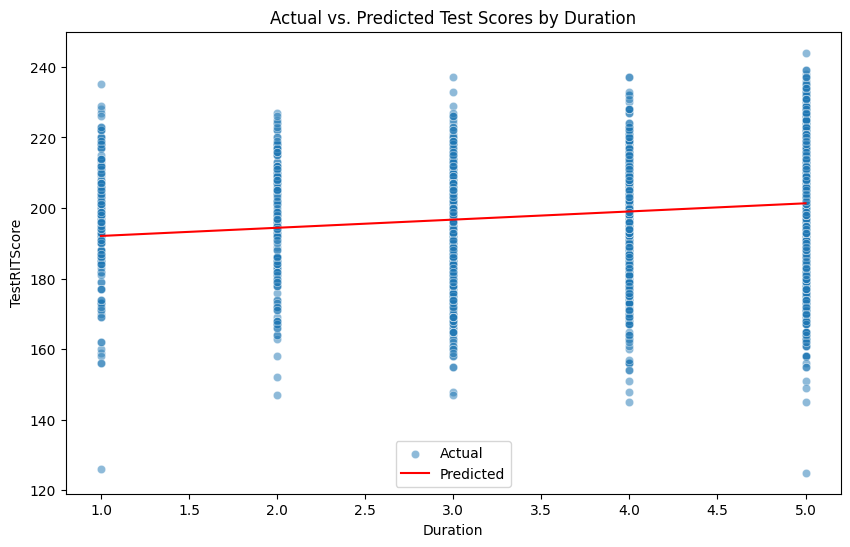

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your model and pred_df are already defined as before

# Get predicted values
pred_df['Predicted'] = model.predict(pred_df)

# Plot actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='TestRITScore', data=precovid_filtered_reading, alpha=0.5, label='Actual')

# Plot predicted trend
sns.lineplot(x='Duration', y='Predicted', data=pred_df, color='red', label='Predicted')

plt.xlabel('Duration')
plt.ylabel('TestRITScore')
plt.title('Actual vs. Predicted Test Scores by Duration')
plt.legend()
plt.show()


# Adding in 20-23

In [41]:
file_path = '/content/drive/My Drive/assessments202021.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']
score2021= data[columns_to_keep]
score2021['Year'] = 2020
score2021.head()

<ipython-input-41-717023de2b00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score2021['Year'] = 2020


,StudentID,Student_StateID,TestName,TestRITScore,LexileScore,Year
0,1001,9784372138,Growth: Math 6+ NJ 2016,190,NaN,2020
1,1001,9784372138,Growth: Math 6+ NJ 2016,202,NaN,2020
2,1001,9784372138,Growth: Reading 6+ NJ 2016 V2,203,750L,2020
3,1002,1591820143,Growth: Math 6+ NJ 2016,230,NaN,2020
4,1002,1591820143,Growth: Reading 6+ NJ 2016 V2,224,1150L,2020


In [42]:
file_path = '/content/drive/My Drive/assessments202122.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']
score2122= data[columns_to_keep]
score2122['Year'] = 2021
score2122.head()

<ipython-input-42-0c373dee1282>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score2122['Year'] = 2021


,StudentID,Student_StateID,TestName,TestRITScore,LexileScore,Year
0,1001,9784372138,Growth: Math 6+ NJ 2016,202,NaN,2021
1,1001,9784372138,Growth: Reading 6+ NJ 2016 V2,190,495L,2021
2,1002,1591820143,Growth: Math 6+ NJ 2016,233,NaN,2021
3,1002,1591820143,Growth: Reading 6+ NJ 2016 V2,224,1150L,2021
4,1003,7816959131,Growth: Math 6+ NJ 2016,201,NaN,2021


In [43]:
file_path = '/content/drive/My Drive/assessments202223.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'TestName','TestRITScore','LexileScore']
score2223= data[columns_to_keep]
score2223['Year'] = 2022
score2223.head()

<ipython-input-43-d12ed5a68916>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score2223['Year'] = 2022


,StudentID,Student_StateID,TestName,TestRITScore,LexileScore,Year
0,1001,9784372138,Growth: Math 6+ NJ 2016,204,NaN,2022
1,1001,9784372138,Growth: Reading 6+ NJ 2016 V2,204,765L,2022
2,1002,1591820143,Growth: Math 6+ NJ 2016,235,NaN,2022
3,1002,1591820143,Growth: Reading 6+ NJ 2016 V2,211,900L,2022
4,1003,7816959131,Growth: Math 6+ NJ 2016,211,NaN,2022


In [44]:
all = pd.concat([merged14, merged15, merged16, merged17, merged18, score2021,score2122,score2223], ignore_index = True)
YearEnrolled2 = all.groupby('StudentID')['Year'].agg(['min', 'max'])
YearEnrolled2.rename(columns={'min': 'first_year', 'max': 'last_year'}, inplace=True)

In [45]:
all = all.merge(YearEnrolled2, on='StudentID', how='left')
all['Duration'] = all['last_year'] - all['first_year']

In [46]:
all['Duration'] = all['Duration'] + 1
print(all.head())

   StudentID  Student_StateID_x                       TestName  TestRITScore  \
0       1002     1591820143.000  Growth: Math K-2 CCSS 2010 V2           170   
1       1002     1591820143.000  Growth: Reading K-2 CCSS 2010           169   
2       1003     7816959131.000  Growth: Math K-2 CCSS 2010 V2           154   
3       1003     7816959131.000  Growth: Reading K-2 CCSS 2010           157   
4       1008     4297133420.000  Growth: Math K-2 CCSS 2010 V2           157   

  LexileScore  Student_StateID_y StudentEthnicGroup StudentGender Grade  Year  \
0         NaN     1591820143.000           Hispanic             M    KF  2014   
1          BR     1591820143.000           Hispanic             M    KF  2014   
2         NaN     7816959131.000              Black             M    KF  2014   
3          BR     7816959131.000              Black             M    KF  2014   
4         NaN     4297133420.000           Hispanic             M    KF  2014   

  StudentID_is_numeric  Student_

In [47]:
# Filter the main DataFrame for the year 2022-2023
outcome2022 = all[all['Year'] == 2022]
continuous_enrollment_cohort_all = outcome2022[(outcome2022['Duration'] == 9) & (outcome2022['last_year'] == 2022)]

In [48]:
file_path = '/content/drive/My Drive/enrollment202223.csv'
data= pd.read_csv(file_path)
columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']
enrollment2223= data[columns_to_keep]

In [49]:
outcome2022 = outcome2022.merge(enrollment2223, on='StudentID', how='right')

<ipython-input-49-b854d2e779e0>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Student_StateID_x'} in the result is deprecated and will raise a MergeError in a future version.
  outcome2022 = outcome2022.merge(enrollment2223, on='StudentID', how='right')


In [50]:
outcome2022.head()

,StudentID,Student_StateID_x,TestName,TestRITScore,LexileScore,Student_StateID_y,StudentEthnicGroup_x,StudentGender_x,Grade_x,Year,StudentID_is_numeric,Student_StateID_x,first_year,last_year,Duration,Student_StateID_y,StudentEthnicGroup_y,StudentGender_y,Grade_y
0,1346,NaN,Growth: Math 6+ NJ 2016,221.000,NaN,NaN,NaN,NaN,NaN,2022.000,NaN,2518046055.000,2020.000,2022.000,3.000,2518046055,Black,F,12
1,1347,NaN,Growth: Math 6+ NJ 2016,237.000,NaN,NaN,NaN,NaN,NaN,2022.000,NaN,8856268182.000,2016.000,2022.000,7.000,8856268182,Black,M,12
2,1347,NaN,Growth: Reading 6+ NJ 2016 V2,208.000,845L,NaN,NaN,NaN,NaN,2022.000,NaN,8856268182.000,2016.000,2022.000,7.000,8856268182,Black,M,12
3,1348,NaN,Growth: Math 6+ NJ 2016,223.000,NaN,NaN,NaN,NaN,NaN,2022.000,NaN,5801895308.000,2016.000,2022.000,7.000,5801895308,Black,F,12
4,1348,NaN,Growth: Reading 6+ NJ 2016 V2,219.000,1055L,NaN,NaN,NaN,NaN,2022.000,NaN,5801895308.000,2016.000,2022.000,7.000,5801895308,Black,F,12


In [53]:
# Late Joiners (joined later but reached Grade 9 in 2018)
late_joiners_all = outcome2022[(outcome2022['Duration'] < 9) & (outcome2022['last_year'] == 2022) & (outcome2022['Grade_y'] == '8')]

In [ ]:
continuous_enrollment_cohort_all.head()

In [55]:
unique_student_ids = late_joiners_all['StudentID'].nunique()
print("Number of unique Student IDs:", unique_student_ids)

Number of unique Student IDs: 71


In [56]:
from scipy import stats
# Perform the t-test on Math TestRITScore
t_stat_math, p_value_math = stats.ttest_ind(
    continuous_enrollment_cohort_all[continuous_enrollment_cohort_all['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    late_joiners_all[late_joiners_all['TestName'].str.contains("Math")]['TestRITScore'].dropna(),
    equal_var=False
)
# Print the results for Math test
print("T-statistic for Math:", t_stat_math)
print("P-value for Math: {:.10f}".format(p_value_math))

T-statistic for Math: 4.241332412095763
P-value for Math: 0.0000424960


In [57]:
# Perform the t-test on Reading TestRITScore
t_stat_reading, p_value_reading = stats.ttest_ind(
    continuous_enrollment_cohort_all[continuous_enrollment_cohort_all['TestName'].str.contains("Reading")]['TestRITScore'].dropna(),
    late_joiners_all[late_joiners_all['TestName'].str.contains("Reading")]['TestRITScore'].dropna(),
    equal_var=False
)
# Print the results for Math test
print("T-statistic for Reading:", t_stat_reading)
print("P-value for Reading: {:.10f}".format(p_value_reading))

T-statistic for Reading: 2.241381647457088
P-value for Reading: 0.0268053511


In [58]:
math_scores2 = all[all['TestName'].str.contains("Math")]
reading_scores2 = all[all['TestName'].str.contains("Reading")]
import statsmodels.api as sm

# Function to model and summarize results
def model_score_improvement(df, test_type):
    # Assuming 'TestRITScore' is the score and 'Duration' is the enrollment duration
    X = df[['Duration']]  # Predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = df['TestRITScore']  # Response

    model = sm.OLS(y, X).fit()  # OLS regression
    print(f"Regression Results for {test_type} Test:")
    print(model.summary())

# Model for Math scores
model_score_improvement(math_scores2, "Math")
# Model for Reading scores
model_score_improvement(reading_scores2, "Reading")


Regression Results for Math Test:
                            OLS Regression Results                            
Dep. Variable:           TestRITScore   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     174.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.31e-39
Time:                        01:06:44   Log-Likelihood:                -53982.
No. Observations:               11478   AIC:                         1.080e+05
Df Residuals:                   11476   BIC:                         1.080e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.7

now perform regression on the 14-22 data without matching year-grade...but before I can do that I need to have 'grade'column for every year TAT so gotta merge 20-21,21-22,22-23 scores with enrollment and concatenate all years once again

In [64]:
file_path = '/content/drive/My Drive/enrollment202021.csv'

data= pd.read_csv(file_path)

columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']
# new DataFrame with only these columns
enrollment2021= data[columns_to_keep]

# Merge on 'StudentID' with an indicator
merged_df = pd.merge(score2021, enrollment2021, on='StudentID', how='inner', indicator=True)

merged20 = merged_df[merged_df['_merge'] == 'both']

merged20.drop(columns=['_merge'], inplace=True)

print(merged20)

      StudentID  Student_StateID_x                       TestName  \
0          1001         9784372138        Growth: Math 6+ NJ 2016   
1          1001         9784372138        Growth: Math 6+ NJ 2016   
2          1001         9784372138  Growth: Reading 6+ NJ 2016 V2   
3          1002         1591820143        Growth: Math 6+ NJ 2016   
4          1002         1591820143  Growth: Reading 6+ NJ 2016 V2   
...         ...                ...                            ...   
2709        997         3224073437  Growth: Reading 6+ NJ 2016 V2   
2710        998         8516994143        Growth: Math 6+ NJ 2016   
2711        998         8516994143  Growth: Reading 6+ NJ 2016 V2   
2712        999         6896858008        Growth: Math 6+ NJ 2016   
2713        999         6896858008  Growth: Reading 6+ NJ 2016 V2   

      TestRITScore LexileScore  Year  Student_StateID_y StudentEthnicGroup  \
0              190         NaN  2020         9784372138              Black   
1              

In [65]:
file_path = '/content/drive/My Drive/enrollment202122.csv'

data= pd.read_csv(file_path)

columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']
# new DataFrame with only these columns
enrollment2122= data[columns_to_keep]

# Merge on 'StudentID' with an indicator
merged_df = pd.merge(score2122, enrollment2122, on='StudentID', how='inner', indicator=True)

merged21 = merged_df[merged_df['_merge'] == 'both']

merged21.drop(columns=['_merge'], inplace=True)

print(merged21)

      StudentID  Student_StateID_x                       TestName  \
0          1001         9784372138        Growth: Math 6+ NJ 2016   
1          1001         9784372138  Growth: Reading 6+ NJ 2016 V2   
2          1002         1591820143        Growth: Math 6+ NJ 2016   
3          1002         1591820143  Growth: Reading 6+ NJ 2016 V2   
4          1003         7816959131        Growth: Math 6+ NJ 2016   
...         ...                ...                            ...   
2870        997         3224073437  Growth: Reading 6+ NJ 2016 V2   
2871        998         8516994143        Growth: Math 6+ NJ 2016   
2872        998         8516994143  Growth: Reading 6+ NJ 2016 V2   
2873        999         6896858008        Growth: Math 6+ NJ 2016   
2874        999         6896858008  Growth: Reading 6+ NJ 2016 V2   

      TestRITScore LexileScore  Year  Student_StateID_y StudentEthnicGroup  \
0              202         NaN  2021         9784372138              Black   
1              

In [66]:
file_path = '/content/drive/My Drive/enrollment202223.csv'

data= pd.read_csv(file_path)

columns_to_keep = ['StudentID', 'Student_StateID', 'StudentEthnicGroup','StudentGender','Grade']
# new DataFrame with only these columns
enrollment2223= data[columns_to_keep]

# Merge on 'StudentID' with an indicator
merged_df = pd.merge(score2223, enrollment2223, on='StudentID', how='inner', indicator=True)

merged22 = merged_df[merged_df['_merge'] == 'both']

merged22.drop(columns=['_merge'], inplace=True)

print(merged22)

      StudentID  Student_StateID_x                       TestName  \
0          1001         9784372138        Growth: Math 6+ NJ 2016   
1          1001         9784372138  Growth: Reading 6+ NJ 2016 V2   
2          1002         1591820143        Growth: Math 6+ NJ 2016   
3          1002         1591820143  Growth: Reading 6+ NJ 2016 V2   
4          1003         7816959131        Growth: Math 6+ NJ 2016   
...         ...                ...                            ...   
2995        997         3224073437  Growth: Reading 6+ NJ 2016 V2   
2996        998         8516994143        Growth: Math 6+ NJ 2016   
2997        998         8516994143  Growth: Reading 6+ NJ 2016 V2   
2998        999         6896858008        Growth: Math 6+ NJ 2016   
2999        999         6896858008  Growth: Reading 6+ NJ 2016 V2   

      TestRITScore LexileScore  Year  Student_StateID_y  \
0              204         NaN  2022         9784372138   
1              204        765L  2022         97843721

In [68]:
allwithgrade = pd.concat([merged14, merged15, merged16, merged17, merged18, merged20,merged21,merged22], ignore_index = True)
YearEnrolled3 = allwithgrade.groupby('StudentID')['Year'].agg(['min', 'max'])
YearEnrolled3.rename(columns={'min': 'first_year', 'max': 'last_year'}, inplace=True)
allwithgrade = allwithgrade.merge(YearEnrolled3, on='StudentID', how='left')
allwithgrade['Duration'] = allwithgrade['last_year'] - allwithgrade['first_year']
allwithgrade['Duration'] = allwithgrade['Duration'] + 1
print(all.head())

   StudentID  Student_StateID_x                       TestName  TestRITScore  \
0       1002     1591820143.000  Growth: Math K-2 CCSS 2010 V2           170   
1       1002     1591820143.000  Growth: Reading K-2 CCSS 2010           169   
2       1003     7816959131.000  Growth: Math K-2 CCSS 2010 V2           154   
3       1003     7816959131.000  Growth: Reading K-2 CCSS 2010           157   
4       1008     4297133420.000  Growth: Math K-2 CCSS 2010 V2           157   

  LexileScore  Student_StateID_y StudentEthnicGroup StudentGender Grade  Year  \
0         NaN     1591820143.000           Hispanic             M    KF  2014   
1          BR     1591820143.000           Hispanic             M    KF  2014   
2         NaN     7816959131.000              Black             M    KF  2014   
3          BR     7816959131.000              Black             M    KF  2014   
4         NaN     4297133420.000           Hispanic             M    KF  2014   

  StudentID_is_numeric  Student_

In [70]:
import statsmodels.api as sm
from patsy import dmatrices
grades_of_interest = ['6', '7', '8', '9','10','11','12']
allwithgrade_filtered = allwithgrade[allwithgrade['Grade'].isin(grades_of_interest)]
allwithgrade_filtered_reading = allwithgrade_filtered[allwithgrade_filtered['TestName'].str.contains("Reading")]
# Prepare the data by creating dummy variables
allwithgrade_filtered_reading['Race'] = allwithgrade_filtered_reading['StudentEthnicGroup'].astype('category')
allwithgrade_filtered_reading['Grade'] = allwithgrade_filtered_reading['Grade'].astype('category')
print(allwithgrade_filtered_reading.shape)


(5785, 15)


<ipython-input-70-9db0d0bf30ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allwithgrade_filtered_reading['Race'] = allwithgrade_filtered_reading['StudentEthnicGroup'].astype('category')
<ipython-input-70-9db0d0bf30ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allwithgrade_filtered_reading['Grade'] = allwithgrade_filtered_reading['Grade'].astype('category')


In [71]:
import statsmodels.formula.api as smf
from patsy import Treatment

# Update the model fitting code
formula = 'TestRITScore ~ Duration + Race'

# Fit the model
model = smf.mixedlm(formula, data=allwithgrade_filtered_reading, groups=allwithgrade_filtered_reading['StudentID']).fit()

# Print the summary of the model
print(model.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       TestRITScore
No. Observations:       5785          Method:                   REML        
No. Groups:             2265          Scale:                    70.5952     
Min. group size:        1             Log-Likelihood:           -22547.3707 
Max. group size:        7             Converged:                Yes         
Mean group size:        2.6                                                 
----------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------
Intercept                      216.676   10.714 20.223 0.000 195.676 237.676
Race[T.Asian]                   10.211   10.990  0.929 0.353 -11.329  31.751
Race[T.Black]                   -0.766   10.728 -0.071 0.943 -21.792  20.261
Race[T.Hispanic]   

In [72]:
grades_of_interest = ['6', '7', '8', '9','10','11','12']
allwithgrade_filtered = allwithgrade[allwithgrade['Grade'].isin(grades_of_interest)]
allwithgrade_filtered_math = allwithgrade_filtered[allwithgrade_filtered['TestName'].str.contains("Math")]
# Prepare the data by creating dummy variables
allwithgrade_filtered_math['Race'] = allwithgrade_filtered_math['StudentEthnicGroup'].astype('category')
allwithgrade_filtered_math['Grade'] = allwithgrade_filtered_math['Grade'].astype('category')
print(allwithgrade_filtered_math.shape)

(5782, 15)


<ipython-input-72-9cbb8cb1e9bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allwithgrade_filtered_math['Race'] = allwithgrade_filtered_math['StudentEthnicGroup'].astype('category')
<ipython-input-72-9cbb8cb1e9bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allwithgrade_filtered_math['Grade'] = allwithgrade_filtered_math['Grade'].astype('category')


In [73]:
# Update the model fitting code
formula = 'TestRITScore ~ Duration + Race'

# Fit the model
model = smf.mixedlm(formula, data=allwithgrade_filtered_math, groups=allwithgrade_filtered_math['StudentID']).fit()

# Print the summary of the model
print(model.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       TestRITScore
No. Observations:       5782          Method:                   REML        
No. Groups:             2267          Scale:                    69.4279     
Min. group size:        1             Log-Likelihood:           -22936.5018 
Max. group size:        7             Converged:                Yes         
Mean group size:        2.6                                                 
----------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------
Intercept                      218.687   12.622 17.326 0.000 193.948 243.426
Race[T.Asian]                   27.175   12.967  2.096 0.036   1.759  52.590
Race[T.Black]                    6.222   12.639  0.492 0.623 -18.550  30.993
Race[T.Hispanic]   